# Projet_P3 : Réalisez une étude de santé publique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

In [2]:
#on charge le dataset de données
url = 'INPUTS_FORMATION/fr_population.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df = data.copy()
df0pop = data.copy()

### Question 1 : donnez le résultat de votre calcul de population mondiale pour l'année 2013.

###### Calcul préliminaire

In [3]:
#on somme [Valeur]
print('\x1b[6;31;40m' + 'Population Mondiale en 2013 : '+str(df['Valeur'].sum()*1000)+' hbts' + '\x1b[0m')

Population Mondiale en 2013 : 8413993000 hbts


###### Investigations : Zones où la population est supérieure à 1 milliard

In [4]:
#on affiche les zones où le nombre est > à 1 milliards d'hbts
df_investig = df[df['Valeur'] > 1000000]
df_investig

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
33,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,351,Chine,511,Population totale,2501,Population,2013,2013,1000 personnes,1416667,A,"Agrégat, peut inclure des données officielles,..."
36,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",511,Population totale,2501,Population,2013,2013,1000 personnes,1385567,NaN,Donnée officielle
75,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,511,Population totale,2501,Population,2013,2013,1000 personnes,1252140,NaN,Donnée officielle


<div class="alert-danger">
<font color='red'> /!\ => PRESENCE DE DEUX ZONES CHINE et CHINE CONTINETALE</font>
</div>

##### Récupération population Chine

In [5]:
#on récupère la population de la Chine
Pop_totale_Chine = df.iloc[int(df[df['Code zone']==351].index[0]),df.columns.get_loc("Valeur")]*1000
print('Pop_totale_Chine : ' +str(Pop_totale_Chine)+' hbts')

Pop_totale_Chine : 1416667000 hbts


##### Calcul Somme : RAS + Provinces Chinoises

In [6]:
#on récupère les populations ségrégéés puis on les somme
df_Chine_HK = df[df['Zone']  =='Chine - RAS de Hong-Kong']
df_Chine_Mac = df[df['Zone'] =='Chine - RAS de Macao']
df_Chine_Tai= df[df['Zone']  =='Chine, Taiwan Province de']
df_Chine_Cont= df[df['Zone'] =='Chine, continentale']
Pop_RAS_Prov = 1000*(df_Chine_HK['Valeur'].sum() + 
                         df_Chine_Mac['Valeur'].sum() + 
                             df_Chine_Tai['Valeur'].sum() + 
                                 df_Chine_Cont['Valeur'].sum())
print('Population RAS & Province : '+str(Pop_RAS_Prov)+' hbts')

Population RAS & Province : 1416667000 hbts


<div class="alert-success">
<font color='green'> => SOURCE PROBLEME TROUVEE : DOUBLON</font>
</div>

##### Détermination population mondiale 2013 corrigée

In [7]:
#par soustraction on en déduit la population mondiale
Pop_Mond = df['Valeur'].sum()*1000 - Pop_totale_Chine
print('\x1b[6;31;40m' + 'Population Mondiale en 2013 : '+str(Pop_Mond)+' hbts'+ '\x1b[0m')

Population Mondiale en 2013 : 6997326000 hbts


### Question 2 : Identifiez ces redondances.

### Equation :
#### Production + importations - exportations + variations des stocks  
#### = quantités disponibles intérieure 
#### = Aliments pour animaux  + Semences + Pertes + Traitement + Autres utilisations + Nourriture

In [8]:
#on charge le dataset de données
url = 'INPUTS_FORMATION/fr_vegetaux.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
dfq2 = data.copy()

In [9]:
#on séléctionne un pays et un produit (exemple demandé France + Blé)
Pays = 'France'
Produit = 'Blé'

#on paramètre le dataframe fonction de Pays et Produit
dfq2_verif = dfq2[dfq2['Zone'] ==Pays]
dfq2_verif = dfq2_verif[dfq2_verif['Produit'] ==Produit]

#définition des termes de l'équation
dfq2_verif_Prod   = dfq2_verif[dfq2_verif['Élément'] =='Production']
dfq2_verif_Import = dfq2_verif[dfq2_verif['Élément'] =='Importations - Quantité']
dfq2_verif_Var    = dfq2_verif[dfq2_verif['Élément'] =='Variation de stock']
dfq2_verif_Export = dfq2_verif[dfq2_verif['Élément'] =='Exportations - Quantité']
dfq2_verif_Dispo  = dfq2_verif[dfq2_verif['Élément'] =='Disponibilité intérieure']
dfq2_verif_Alimts = dfq2_verif[dfq2_verif['Élément'] =='Aliments pour animaux']
dfq2_verif_Semen  = dfq2_verif[dfq2_verif['Élément'] =='Semences']
dfq2_verif_Pertes = dfq2_verif[dfq2_verif['Élément'] =='Pertes']
dfq2_verif_Trait  = dfq2_verif[dfq2_verif['Élément'] =='Traitement']
dfq2_verif_Autres = dfq2_verif[dfq2_verif['Élément'] =='Autres utilisations (non alimentaire)']
dfq2_verif_Nourr  = dfq2_verif[dfq2_verif['Élément'] =='Nourriture']

#Soient les quantités suivantes :
#Q1 = Production + importations - exportations + variations des stocks
#Q2 = Quantités disponibles intérieure 
#Q3 = Aliments pour animaux + Semences + Pertes + Traitement + Autres utilisations + Nourriture

#on calcule chacune des 3 quantités
Q1 = 1000*(dfq2_verif_Prod['Valeur'].sum() + dfq2_verif_Import['Valeur'].sum()
           - dfq2_verif_Export['Valeur'].sum() + dfq2_verif_Var['Valeur'].sum())
Q2 = 1000*(dfq2_verif_Dispo['Valeur'].sum())
Q3 = 1000*(dfq2_verif_Alimts['Valeur'].sum() + dfq2_verif_Semen['Valeur'].sum()
           + dfq2_verif_Pertes['Valeur'].sum() + dfq2_verif_Trait['Valeur'].sum()
             + dfq2_verif_Autres['Valeur'].sum() + dfq2_verif_Nourr['Valeur'].sum())

print('Q1 : '+str(Q1)+' tonnes')
print('Q2 : '+str(Q2)+' tonnes')
print('Q3 : '+str(Q3)+' tonnes')
if Q1==Q2==Q3 :
    print('Redondance vérifiée')

Q1 : 20298000.0 tonnes
Q2 : 20298000.0 tonnes
Q3 : 20298000.0 tonnes
Redondance vérifiée


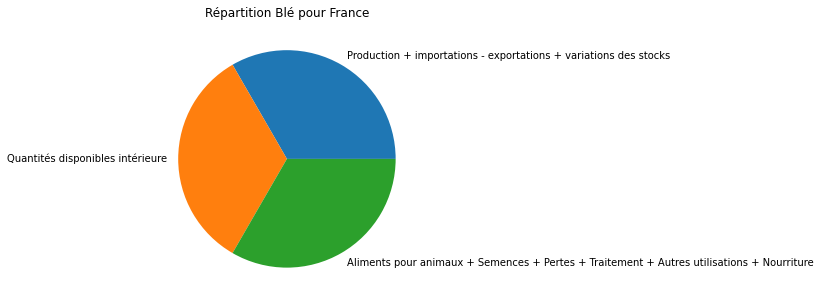

In [10]:
#on illustre les deux égalités
dfq2_verif_pie = pd.DataFrame({'value': [Q1,Q2,Q3]},
                  index=['Production + importations - exportations + variations des stocks', 
                         'Quantités disponibles intérieure', 
                         'Aliments pour animaux + Semences + Pertes + Traitement + Autres utilisations + Nourriture'])

plot=dfq2_verif_pie.plot.pie(title='Répartition '+ Produit + ' pour '+ Pays ,y='value', figsize=(5, 5),legend=None)
plt.ylabel("value")
plt.gca().axes.yaxis.set_visible(False)

##### Téléchargement de tous les datasets et suppression doublon (Chine)

In [11]:
url = 'INPUTS_FORMATION/fr_population.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df1 = data.copy()
#on supprime la ligne correspondant à Zone = Chine (cf. doublons)
df1 = df1.drop(df1[df1['Code zone'] ==351].index, inplace=False)

In [12]:
url = 'INPUTS_FORMATION/fr_vegetaux.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df2 = data.copy()
#on supprime la ligne correspondant à Zone = Chine (cf. doublons)
df2 = df2.drop(df2[df2['Code zone'] ==351].index, inplace=False)

In [13]:
url = 'INPUTS_FORMATION/fr_animaux.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df3 = data.copy()
#on supprime la ligne correspondant à Zone = Chine (cf. doublons)
df3 = df3.drop(df3[df3['Code zone'] ==351].index, inplace=False)

In [14]:
url = 'INPUTS_FORMATION/fr_céréales.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df4 = data.copy()
#on supprime la ligne correspondant à Zone = Chine (cf. doublons)
df4 = df4.drop(df4[df4['Code zone'] ==351].index, inplace=False)

In [15]:
url = 'INPUTS_FORMATION/fr_sousalimentation.csv'
data = pd.read_csv(url, sep=',',encoding='utf-8')
df5 = data.copy()
#on supprime la ligne correspondant à Zone = Chine (cf. doublons)
df5 = df5.drop(df5[df5['Code zone'] ==351].index, inplace=False)

### Question 3 : Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

##### Concaténation des datasets vegetx et animx de même structure

In [16]:
#on concatène les 2 datasets
frames = [df2, df3]
result = pd.concat(frames, keys=['vegetx','animx'])

##### Merge de ce df avec le dataset population

In [17]:
#on récupère l'info population mondiale que l'on intègre au df issu de la concanténation précédente
table = pd.merge(result, df1, how="left", on="Zone")
#on renomme les []
table.rename(columns={'Code Domaine_x':'Code Domaine','Domaine_x':'Domaine','Code zone_x':'Code zone',
                       'Code Élément_x':'Code Élément','Élément_x':'Élément','Code Produit_x':'Code Produit',
'Produit_x':'Produit','Code année_x':'Code année','Année_x':'Année','Unité_x':'Unité','Valeur_x':'Valeur',
'Symbole_x':'Symbole','Description du Symbole_x':'Description du Symbole','Unité_y':'Unité_population',
                      'Valeur_y':'Valeur_populationx1000'}, inplace=True)
#on sélectionne les [] que l'on veut conserver
table=table[['Zone','Code zone','Élément','Année','Code Produit','Produit','Unité','Valeur','Unité_population',
             'Valeur_populationx1000']]

##### Réorganisation du df avec fonction pivot_table

In [18]:
#on factorise on met en avant les valeurs par éléments pour chaque produit
table = table.pivot_table(index=['Zone','Code zone','Année','Produit','Code Produit','Valeur_populationx1000'],
                          columns=['Élément'],
                          values='Valeur',
#                           aggfunc=np.sum,
                          fill_value=0).reset_index()
#on fait une copie pour la partie SQL (>Q14)
table_q16 = table.copy()

##### Détermination de la dispon kcal totale en itérant sur la table

In [19]:
for j, row in table.iterrows():
#on créée une nouvelle []
    table.loc[j,'Dispo_TOT_KCAL'] = row['Disponibilité alimentaire (Kcal/personne/jour)']*row['Valeur_populationx1000']*1000*365
#on somme les valeurs de cette []
somme_Dtot_kca = table['Dispo_TOT_KCAL'].sum()
print('\x1b[6;31;40m' + "Dispon totale kcal (Q3)   : %.2e" %somme_Dtot_kca + " kcal" + '\x1b[0m')

Dispon totale kcal (Q3)   : 7.36e+15 kcal


##### Détermination de la dispon kg totale en itérant sur la table

In [20]:
for j, row in table.iterrows():
#on créée une nouvelle []
    table.loc[j,'Dispo_TOT_KG'] = (row['Disponibilité alimentaire en quantité (kg/personne/an)'])*row['Valeur_populationx1000']*1000
#on somme les valeurs de cette []
somme_Dtot_kg = table['Dispo_TOT_KG'].sum()
print('\x1b[6;31;40m' + "Dispon totale kg (Q3)   : %.2e" %somme_Dtot_kg + " kg" + '\x1b[0m')
#on fait une copie pour la partie SQL (>Q14)
table_q15 = table.copy()

Dispon totale kg (Q3)   : 4.88e+12 kg


### Question 4 : Calculez pour chaque produit le ratio "énergie/poids" (en kcal/kg). Vérifier la cohérence avec les données internet.

##### Calcul du Ratio = Energie / Poids total

In [21]:
#on remplace les 0 par NaN pour éviter ZeroDivisionError dans ratio (autre possibilité avec try & except)
table['Dispo_TOT_KG'] = table['Dispo_TOT_KG'].replace(0 ,np.nan)

for j, row in table.iterrows():
#on créée une nouvelle [] issue du calcul entre les 2 [] précédemment créées
    table.loc[j,'RATIO_KCAL_KG'] = row['Dispo_TOT_KCAL']/row['Dispo_TOT_KG']
# table.head()

##### Comparaison pour la valeur calorique (produit = oeuf)

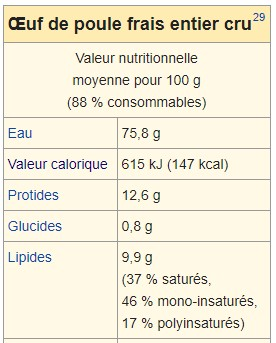

In [22]:
#on séléctionne 1 produit (ici : "Oeufs")
produit_choisi = table[(table.Produit == 'Oeufs')]
n = len(produit_choisi)
maListe = []
for i in range(n): 
#on relève la valeur pour chaque ligne de [RATIO_KCAL_KG]
    rate = produit_choisi.iloc[i,produit_choisi.columns.get_loc('RATIO_KCAL_KG')]
#remplissage de maListe
    maListe.append(rate)
#création df avec maListe
dmaListe = pd.DataFrame({'produit_choisi': maListe })
#conversion numérique
dmaListe['produit_choisi'] = pd.to_numeric(dmaListe['produit_choisi'])
#calcul moyenne liste
average = dmaListe['produit_choisi'].mean()
print('\x1b[6;31;40m' + "Valeur calorique moyenne    : %0.f" %average + " Kcal/kg" + '\x1b[0m')
print('\x1b[6;31;40m' + "Valeur calorique théorique  : " + str(147*10) +" Kcal/kg" + '\x1b[0m')

Valeur calorique moyenne    : 1365 Kcal/kg
Valeur calorique théorique  : 1470 Kcal/kg


##### Calcul du % : Protéine = Poids de protéines / poids total

In [23]:
for j, row in table.iterrows():
#on créée une nouvelle []
    table.loc[j,'RATIO_POIDS_PROTEINES'] = 100*(row['Disponibilité de protéines en quantité (g/personne/jour)']*1e-3*365*row['Valeur_populationx1000']*1000)/row['Dispo_TOT_KG']
# table.head()

##### Formatage valeurs des 4 colonnes créées

In [24]:
#on formate les valeurs des 4 [] précédemment créées
table['Dispo_TOT_KCAL'] = table['Dispo_TOT_KCAL'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
table['Dispo_TOT_KG']   = table['Dispo_TOT_KG'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
table['RATIO_KCAL_KG']  = table['RATIO_KCAL_KG'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
table['RATIO_POIDS_PROTEINES'] = table['RATIO_POIDS_PROTEINES'].apply(lambda x: "{:.1f}".format(x) if not pd.isnull(x) else x)

##### Comparaison du % protéine (produit = avoine)

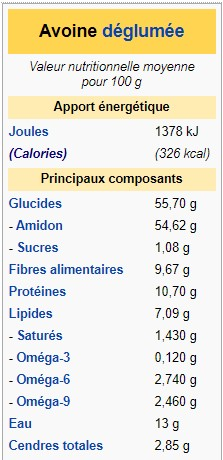

In [25]:
#on séléctionne 1 produit (ici : "Avoine")
produit_choisi = table[(table.Produit == 'Avoine')]
n = len(produit_choisi)
maListe = []
for i in range(n): 
#on relève la valeur pour chaque ligne de [RATIO_POIDS_PROTEINES]
    rate = produit_choisi.iloc[i,produit_choisi.columns.get_loc('RATIO_POIDS_PROTEINES')] 
#remplissage maListe
    maListe.append(rate)
#création df avec maListe
dmaListe = pd.DataFrame({'produit_choisi': maListe })
#conversion numérique
dmaListe['produit_choisi'] = pd.to_numeric(dmaListe['produit_choisi'])
#on remplace les 0 par des NaN pour ne pas fausser la moyenne
dmaListe['produit_choisi'] = dmaListe['produit_choisi'].replace(0 ,np.nan)
#calcul moyenne liste
average = dmaListe['produit_choisi'].mean()
print('\x1b[6;31;40m' + "Teneur en protéines moyenne   : %0.1f" %average + " %" + '\x1b[0m')
print('\x1b[6;31;40m' + "Teneur en protéines théorique : " + str(10.7) +" %" + '\x1b[0m')

Teneur en protéines moyenne   : 8.8 %
Teneur en protéines théorique : 10.7 %


### Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.

In [26]:
#conversion numérique de [RATIO_KCAL_KG]
table['RATIO_KCAL_KG'] = pd.to_numeric(table['RATIO_KCAL_KG'])
#on remplace les 0 par des NaN pour ne pas fausser la moyenne
table['RATIO_KCAL_KG'] = table['RATIO_KCAL_KG'].replace(0 ,np.nan)
#aggrégation & création d'une nouvelle table moyennant chaque produit sur tous les pays
table_agg = table.groupby(['Produit']).agg({'RATIO_KCAL_KG':np.mean})
#tri [RATIO_KCAL_KG] par ordre décroissant
table_agg_sorted_desc = table_agg.sort_values(['RATIO_KCAL_KG'], ascending=0)
#formatage données
table_agg_sorted_desc['RATIO_KCAL_KG'] = table_agg_sorted_desc['RATIO_KCAL_KG'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
table_agg_sorted_desc['RATIO_KCAL_KG'] = pd.to_numeric(table_agg_sorted_desc['RATIO_KCAL_KG'])
#affichage des 5 aliments les plus caloriques
table_agg_sorted_desc.nlargest(5, 'RATIO_KCAL_KG')

Élément,RATIO_KCAL_KG
Produit,
Huiles de Foie de Poisso,11809.0
Huile de Sésame,10146.0
Huile d'Olive,9293.0
Huile de Germe de Maïs,9257.0
Huile de Son de Riz,9206.0


### Question 5 : Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [27]:
#conversion numérique de [RATIO_POIDS_PROTEINES]
table['RATIO_POIDS_PROTEINES'] = pd.to_numeric(table['RATIO_POIDS_PROTEINES'])
#on remplace les 0 par des NaN pour ne pas fausser la moyenne
table['RATIO_POIDS_PROTEINES'] = table['RATIO_POIDS_PROTEINES'].replace(0 ,np.nan)
#aggrégation & création d'une nouvelle table moyennant chaque produit sur tous les pays
table_agg_P = table.groupby(['Produit']).agg({'RATIO_POIDS_PROTEINES':np.mean})
#tri [RATIO_POIDS_PROTEINES] par ordre décroissant et affichage des 5 aliments les plus caloriques
table_agg_P_sorted_desc = table_agg_P.sort_values(['RATIO_POIDS_PROTEINES'], ascending=0)
#formatage données
table_agg_P_sorted_desc['RATIO_POIDS_PROTEINES']  = table_agg_P_sorted_desc['RATIO_POIDS_PROTEINES'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
table_agg_P_sorted_desc['RATIO_POIDS_PROTEINES'] = pd.to_numeric(table_agg_P_sorted_desc['RATIO_POIDS_PROTEINES'])
#affichage des 5 aliments les plus riches en protéines
table_agg_P_sorted_desc.nlargest(5, 'RATIO_POIDS_PROTEINES')

Élément,RATIO_POIDS_PROTEINES
Produit,
Graines Colza/Moutarde,36.0
Soja,27.0
Arachides Decortiquees,25.0
Pois,22.0
Légumineuses Autres,22.0


### Question 6 : Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [28]:
#création set contenant les différents produits existant dans le dataset vegetaux
list_vegtx = tuple(df2['Produit'].unique())

n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    val_prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur dans la liste des produits vegetaux précdémment établie
    if val_prod in list_vegtx :
#alors création [] contenant le produit [RATIO_KCAL_KG] x [disponibilité intérieure]
        table.loc[i,'DISP_IN_MOND_KCAL_Q6'] = table.iloc[i,table.columns.get_loc('RATIO_KCAL_KG')]*table.iloc[i,table.columns.get_loc('Disponibilité intérieure')]*1000000
#on somme les valeurs de cette []
somme_q6_kca = table['DISP_IN_MOND_KCAL_Q6'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q6)   : %.2e" %somme_q6_kca + " kcal" + '\x1b[0m')

Disponibilité intérieure mondiale (Q6)   : 1.22e+16 kcal


### Question 7:  Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? 

##### Donnez les résultats en termes de calories

In [29]:
#info:quantité de calories nécessaires chaque jour à l'adulte en moyenne, de 2400 à 2600 kcal par jour.
#partons sur un besoin nutritionnel moyen => 2500 kcal/jr
nb_humains = somme_q6_kca / (2500*365) #données globales annuelles
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Nb humains nourris   : 13333058241
Rapporté à la pop Mondiale   : 191 %


##### Donnez les résultats en termes de protéines

In [30]:
#même calcul qu'en Q6, mais en utilisant le ratio [RATIO_POIDS_PROTEINES]
n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    val_prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur dans la liste des produits vegetaux
    if val_prod in list_vegtx :
#alors création [] contenant le produit [RATIO_POIDS_PROTEINES)] x [disponibilité intérieure]
        table.loc[i,'DISP_IN_MOND_KG_Q7'] = 1/100*table.iloc[i,table.columns.get_loc('RATIO_POIDS_PROTEINES')]*table.iloc[i,table.columns.get_loc('Disponibilité intérieure')]*1000000
#on somme les valeurs de cette []
somme_q6_prot = table['DISP_IN_MOND_KG_Q7'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q7)   : %.2e" %somme_q6_prot + " kg" + '\x1b[0m')

#info:quantité de protéines nécessaires chaque jour à l'adulte en moyenne, 0.83 g/kg/jr
#considérons le besoin nutritionnel pour un adulte moyen de 70kg => 58 g/pers/jr
nb_humains = somme_q6_prot / (58*1e-3*365) #données globales annuelles
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Disponibilité intérieure mondiale (Q7)   : 2.92e+11 kg
Nb humains nourris   : 13802065942
Rapporté à la pop Mondiale   : 197 %


### Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux + la nourriture végétale destinée aux animaux + les pertes de produits végétaux étaient utilisés pour de la nourriture ?

##### Donnez les résultats en termes de calories

In [31]:
#même calcul qu'en Q6, mais en utilisant la somme des 3 éléments visés (et non plus la dispo intérieure)
n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    val_prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur dans la liste des produits vegetaux
    if val_prod in list_vegtx :
#alors création [] contenant le produit [RATIO_KCAL_KG] x [somme 3 Eléments visés]
        table.loc[i,'DISP_IN_MOND_KCAL_Q8'] = table.iloc[i,table.columns.get_loc('RATIO_KCAL_KG')]*1000000*(table.iloc[i,table.columns.get_loc('Nourriture')]+table.iloc[i,table.columns.get_loc('Aliments pour animaux')]+table.iloc[i,table.columns.get_loc('Pertes')])
#on somme toutes les valeurs de cette []
somme_q8_kca = table['DISP_IN_MOND_KCAL_Q8'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q8)   : %.2e" %somme_q8_kca + " kcal" + '\x1b[0m')

#info:quantité de calories nécessaires chaque jour à l'adulte en moyenne, de 2400 à 2600 kcal par jour.
#partons sur un besoin nutritionnel moyen => 2500 kcal/jr
nb_humains = somme_q8_kca / (2500*365)
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Disponibilité intérieure mondiale (Q8)   : 9.17e+15 kcal
Nb humains nourris   : 10049419319
Rapporté à la pop Mondiale   : 144 %


##### Donnez les résultats en termes de protéines

In [32]:
#même calcul qu'en Q7, mais en utilisant la somme des 3 éléments visés (et non plus la dispo intérieure)
n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    val_prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur dans la liste des produits vegetaux
    if val_prod in list_vegtx :
#alors création [] contenant le produit [RATIO_POIDS_PROTEINES] x [somme 3 Eléments visés]
        table.loc[i,'DISP_IN_MOND_KG_Q8'] = 1/100*table.iloc[i,table.columns.get_loc('RATIO_POIDS_PROTEINES')]*1000000*(table.iloc[i,table.columns.get_loc('Nourriture')]+table.iloc[i,table.columns.get_loc('Aliments pour animaux')]+table.iloc[i,table.columns.get_loc('Pertes')])
#on somme toutes les valeurs de cette []
somme_q8_prot = table['DISP_IN_MOND_KG_Q8'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q8)   : %.2e" %somme_q8_prot + " kg" + '\x1b[0m')

#info:quantité de protéines nécessaires chaque jour à l'adulte en moyenne, 0.83 g/kg/jr
#considérons le besoin nutritionnel pour un adulte moyen de 70kg => 58 g/pers/jr
nb_humains = somme_q8_prot / (58*1e-3*365)
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Disponibilité intérieure mondiale (Q8)   : 2.05e+11 kg
Nb humains nourris   : 9666385215
Rapporté à la pop Mondiale   : 138 %


### Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

##### Donnez les résultats en termes de calories

In [33]:
#même calcul qu'en Q8, mais pour TOUS les produits (animx & vegetx) & élément = Nourriture seulement
n = len(table)
for i, row in table.iterrows():
#alors création [] contenant le produit [RATIO_KCAL_KG)] x [Nourriture]
    table.loc[i,'DISP_IN_MOND_KCAL_Q9'] = table.iloc[i,table.columns.get_loc('RATIO_KCAL_KG')]*1000000*(table.iloc[i,table.columns.get_loc('Nourriture')])
#on somme les valeurs de cette []
somme_q9_kca = table['DISP_IN_MOND_KCAL_Q9'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q9)   : %.2e" %somme_q9_kca + " kcal" + '\x1b[0m')

#info:quantité de calories nécessaires chaque jour à l'adulte en moyenne, de 2400 à 2600 kcal par jour.
#partons sur un besoin nutritionnel moyen => 2500 kcal/jr
nb_humains = somme_q9_kca / (2500*365)
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Disponibilité intérieure mondiale (Q9)   : 7.36e+15 kcal
Nb humains nourris   : 8063685261
Rapporté à la pop Mondiale   : 115 %


##### Donnez les résultats en termes de protéines

In [34]:
#même calcul qu'en Q8, mais pour TOUS les produits (animx & vegetx) & élément = Nourriture seulement
n = len(table)
for i, row in table.iterrows():
#alors création [] contenant le produit [RATIO_POIDS_PROTEINES] x [Nourriture]
        table.loc[i,'DISP_IN_MOND_KG_Q9'] = 1/100*table.iloc[i,table.columns.get_loc('RATIO_POIDS_PROTEINES')]*1000000*(table.iloc[i,table.columns.get_loc('Nourriture')])
#on somme les valeurs de cette []
somme_q9_prot = table['DISP_IN_MOND_KG_Q9'].sum()
print('\x1b[6;31;40m' + "Disponibilité intérieure mondiale (Q9)   : %.2e" %somme_q9_prot + " kg" + '\x1b[0m')

#info:quantité de protéines nécessaires chaque jour à l'adulte en moyenne, 0.83 g/kg/jr
#considérons le besoin nutritionnel pour un adulte moyen de 70kg => 58 g/pers/jr
nb_humains = somme_q9_prot / (58*1e-3*365)
print('\x1b[6;31;40m' + "Nb humains nourris   : %.f" %nb_humains + '\x1b[0m')
prcent_hum = 100*(nb_humains/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.0f" %prcent_hum + " %"+ '\x1b[0m')

Disponibilité intérieure mondiale (Q9)   : 2.07e+11 kg
Nb humains nourris   : 9791363533
Rapporté à la pop Mondiale   : 140 %


### Question 10 : A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [35]:
#séléctionner l'année 2013 incluse dans 2012-2014
result = df5.loc[(df5['Année']=="2012-2014",['Valeur'])]
#on remplace les caractères spéciaux avec comme hypothèse la considération de la valeur max (0.1 -> 100000 pers)
result['Valeur'] = result['Valeur'].replace('<0.1' ,'0.1')
result['Valeur'] = pd.to_numeric(result['Valeur'])
#on ajuste l'unité de la population
pop_ssal = result['Valeur'].sum()*1e6
print('\x1b[6;31;40m' + "population mondiale en sous-nutrition (2012-2014)   : %.f" %pop_ssal + '\x1b[0m')
prcent_hum = 100*(pop_ssal/(df1['Valeur'].sum()*1000))
print('\x1b[6;31;40m' + "Rapporté à la pop Mondiale   : %.1f" %prcent_hum + " %"+ '\x1b[0m')
print('')              

population mondiale en sous-nutrition (2012-2014)   : 746000000
Rapporté à la pop Mondiale   : 10.7 %



### Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

##### Récupération liste céréales selon FAO from df céréales (df4)

In [36]:
#création sets contenant les différents céréales existant dans le dataset céréales
list_cereal = tuple(df4['Produit'].unique())
list_cereal_code = tuple(df4['Code Produit'].unique())
# print(list_cereal)
# print(list_cereal_code)

##### Création colonne booléen 

In [37]:
n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    val_prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur contenue dans la liste des céréales pécédemment établie alors création [] contenant True or False
    if val_prod in list_cereal :
        table.loc[i,'is_cereal'] = 'True'
    else :
        table.loc[i,'is_cereal'] = 'False'

##### Somme sur [aliments pr animx] selon condition [is_cereal]

In [38]:
#on somme les valeurs si [is_cereal] = True
prop_tot_alim_animx_cereal = table.loc[(table['is_cereal']=="True"),['Aliments pour animaux']].sum()
prop_tot_alim_humain_cereal = table.loc[(table['is_cereal']=="True"),['Nourriture']].sum()
print('\x1b[6;31;40m' + "proportion destinée à l'alimentation animale   : %.f" %prop_tot_alim_animx_cereal + " Milliers de tonnes"+ '\x1b[0m')
#ratio vs alimentation totale
prcent_prop = 100*prop_tot_alim_animx_cereal.unique()/(prop_tot_alim_animx_cereal.unique()+prop_tot_alim_humain_cereal.unique())
print('\x1b[6;31;40m' + "proportion destinée à l'alimentation animale   : %.f" %prcent_prop + " %"+ '\x1b[0m')

proportion destinée à l'alimentation animale   : 873535 Milliers de tonnes
proportion destinée à l'alimentation animale   : 46 %


##### Repérez les 15 produits les plus exportés par ce groupe de pays.

In [39]:
#listing des pays concernés par la ss-nutrition selon la FAO et fomatage
list_Zone_ssal = df5['Zone'].unique()

#Formatage + filtre sur l'année qui nous intéresse ici 2013
df5['Valeur'] = df5['Valeur'].replace('<0.1' ,'0.1')
df5['Valeur'] = pd.to_numeric(df5['Valeur'])
df5_filter_year = df5.groupby(['Année']).get_group(('2012-2014')).reset_index(drop=False).sort_values('Valeur', ascending=0)

#intégration de ce df5 filtré au df table + drop [col] inutiles + rename
table = pd.merge(table, df5_filter_year, how="left", on="Zone")
table = table.drop(['index','Code Domaine', 'Domaine', 'Code zone_y','Code Élément', 'Élément', 'Code Produit_y',
 'Produit_y', 'Code année','Année_y', 'Unité', 'Symbole', 'Description du Symbole','Note'], axis=1) 
table.rename(columns={'Code zone_x':'Code zone','Année_x':'Année','Produit_x':'Produit','Code Produit_x':'Code Produit',
'Valeur':'Valeur_sousalx1e6'}, inplace=True)

#parcours de la table et relève des 3 informations si pays concerné par sous-nutrition
List_pays   = []        
List_produit= []
List_export = []
n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Zone]
    Zone = table.iloc[i,table.columns.get_loc('Zone')]
#si valeur dans liste des pays sous-alimentés pécédemment identifiée ...
    if Zone in list_Zone_ssal :
        pays = table.iloc[i,table.columns.get_loc('Zone')]
        List_pays.append(pays)
        produit = table.iloc[i,table.columns.get_loc('Produit')]
        List_produit.append(produit)
        export = table.iloc[i,table.columns.get_loc('Exportations - Quantité')]
        List_export.append(export)
#création df avec ces 3 Lists
df_15produits = pd.DataFrame({'Zone_Z_ssal': List_pays,'Produit_Z_ssal': List_produit,'Exportations_Z_ssal': List_export})
#conversion numérique
df_15produits['Exportations_Z_ssal'] = pd.to_numeric(df_15produits['Exportations_Z_ssal'])
#aggrégation selon Produit & création d'une table résultat
df_15prod_agg = df_15produits.groupby(['Produit_Z_ssal']).agg({'Exportations_Z_ssal':np.sum}).reset_index(drop=False)
#tri [Exportations_Z_ssal] par ordre décroissant
df_15prod_agg_sort = df_15prod_agg.sort_values(['Exportations_Z_ssal'], ascending=0)
#affichage des 15 produits les + exportés
df_15prod_agg_sort_nLarg = df_15prod_agg_sort.nlargest(15, 'Exportations_Z_ssal')
df_15prod_agg_sort_nLarg

,Produit_Z_ssal,Exportations_Z_ssal
12,Blé,198380
52,Maïs,128787
48,Lait - Excl Beurre,125098
81,Soja,106912
83,Sucre Eq Brut,68320
39,Huile de Palme,50673
49,"Légumes, Autres",44535
62,Orge,41585
79,Riz (Eq Blanchi),41445
61,"Oranges, Mandarines",37489


##### Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné)
##### Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits.

In [40]:
#extraction des 15 first values & création liste
les_15 = list(df_15prod_agg_sort_nLarg["Produit_Z_ssal"])[:15]
# print (les_15)

#parcours de la table et relève des informations suivantes
List_pays   = []        
List_produit= []
List_import = []
List_other_use = []
List_disp_int = []
List_alimts_animx = []
List_nourrit = []

n = len(table)
for i, row in table.iterrows():
#on relève la valeur pour chaque ligne de [Zone]
    Prod = table.iloc[i,table.columns.get_loc('Produit')]
#si valeur dans liste des 15 produits pécédemment identifiée ...dans le df principal
    if (Prod in les_15) :
        pays = table.iloc[i,table.columns.get_loc('Zone')]
        List_pays.append(pays)
        produit = table.iloc[i,table.columns.get_loc('Produit')]
        List_produit.append(produit)
        Import = table.iloc[i,table.columns.get_loc('Importations - Quantité')]
        List_import.append(Import)
        other_use = table.iloc[i,table.columns.get_loc('Autres utilisations (non alimentaire)')]
        List_other_use.append(other_use)
        disp_int = table.iloc[i,table.columns.get_loc('Disponibilité intérieure')]
        List_disp_int.append(disp_int)
        alimts_animx = table.iloc[i,table.columns.get_loc('Aliments pour animaux')]
        List_alimts_animx.append(alimts_animx)
        nourrit = table.iloc[i,table.columns.get_loc('Nourriture')]
        List_nourrit.append(nourrit)      
#création df avec ces Lists
a = pd.DataFrame({'Zone_Z_ssal_200': List_pays,'Produit_Z_ssal_200': List_produit,'Importations_Z_ssal_200': List_import,'Use_Z_ssal_200': List_other_use,'Disp_Z_ssal_200': List_disp_int,'Alim_ani_Z_ssal_200': List_alimts_animx,'Nourr_Z_ssal_200': List_nourrit})
#tri des 200 importations par ordre décroissant
b = a.sort_values(['Importations_Z_ssal_200'], ascending=0)[0:200]
#aggrégation selon produit & création d'une table résultat contenant les 15 produits identifiés 
c = b.groupby(['Produit_Z_ssal_200']).agg({'Importations_Z_ssal_200':np.sum,
                                               'Use_Z_ssal_200':np.sum,
                                                  'Disp_Z_ssal_200':np.sum,
                                                     'Alim_ani_Z_ssal_200':np.sum,
                                                       'Nourr_Z_ssal_200':np.sum}).reset_index(drop=False)
c

,Produit_Z_ssal_200,Importations_Z_ssal_200,Use_Z_ssal_200,Disp_Z_ssal_200,Alim_ani_Z_ssal_200,Nourr_Z_ssal_200
0,Blé,146539,14397,447942,95503,296612
1,"Fruits, Autres",15714,0,72851,0,66962
2,Huile de Palme,29747,18568,25618,0,6833
3,Lait - Excl Beurre,87377,12337,341118,27211,298843
4,"Légumes, Autres",27116,0,79708,3428,69830
5,Manioc,34655,20355,67326,25149,15257
6,Maïs,101416,181868,687785,392162,55251
7,"Oranges, Mandarines",22945,1,19534,0,19192
8,Orge,22387,12,29473,20153,338
9,Poissons Pelagiques,13445,0,16094,12156,3937


##### Ratio entre quantité destinée aux Autres utilisations et Disponibilité intérieure


In [41]:
n = len(c)
for i, row in c.iterrows():
#création [] contenant le ratio [Use] / [Dispo int] pour les 15 produits
        c.loc[i,'OtherUse_v_Disp'] = 100*(c.iloc[i,c.columns.get_loc('Use_Z_ssal_200')]/c.iloc[i,c.columns.get_loc('Disp_Z_ssal_200')])
#formatage du ratio
c['OtherUse_v_Disp'] = c['OtherUse_v_Disp'].apply(lambda x: "{:.1f}".format(x) if not pd.isnull(x) else x)
c

,Produit_Z_ssal_200,Importations_Z_ssal_200,Use_Z_ssal_200,Disp_Z_ssal_200,Alim_ani_Z_ssal_200,Nourr_Z_ssal_200,OtherUse_v_Disp
0,Blé,146539,14397,447942,95503,296612,3.2
1,"Fruits, Autres",15714,0,72851,0,66962,0.0
2,Huile de Palme,29747,18568,25618,0,6833,72.5
3,Lait - Excl Beurre,87377,12337,341118,27211,298843,3.6
4,"Légumes, Autres",27116,0,79708,3428,69830,0.0
5,Manioc,34655,20355,67326,25149,15257,30.2
6,Maïs,101416,181868,687785,392162,55251,26.4
7,"Oranges, Mandarines",22945,1,19534,0,19192,0.0
8,Orge,22387,12,29473,20153,338,0.0
9,Poissons Pelagiques,13445,0,16094,12156,3937,0.0


##### Ratio entre quantité destinée à la Nourriture animale et quantité destinée à la Nourriture (animale + humaine)

In [42]:
n = len(c)
for i, row in c.iterrows():
#création [] contenant le ratio [Aliments_animaux] / [Nourriture] pour les 15 produits
        c.loc[i,'Alim_v_Nourriture'] = 100*(c.iloc[i,c.columns.get_loc('Alim_ani_Z_ssal_200')]/(c.iloc[i,c.columns.get_loc('Alim_ani_Z_ssal_200')]+c.iloc[i,c.columns.get_loc('Nourr_Z_ssal_200')]))
#formatage du ratio
c['Alim_v_Nourriture'] = c['Alim_v_Nourriture'].apply(lambda x: "{:.1f}".format(x) if not pd.isnull(x) else x)
c

,Produit_Z_ssal_200,Importations_Z_ssal_200,Use_Z_ssal_200,Disp_Z_ssal_200,Alim_ani_Z_ssal_200,Nourr_Z_ssal_200,OtherUse_v_Disp,Alim_v_Nourriture
0,Blé,146539,14397,447942,95503,296612,3.2,24.4
1,"Fruits, Autres",15714,0,72851,0,66962,0.0,0.0
2,Huile de Palme,29747,18568,25618,0,6833,72.5,0.0
3,Lait - Excl Beurre,87377,12337,341118,27211,298843,3.6,8.3
4,"Légumes, Autres",27116,0,79708,3428,69830,0.0,4.7
5,Manioc,34655,20355,67326,25149,15257,30.2,62.2
6,Maïs,101416,181868,687785,392162,55251,26.4,87.7
7,"Oranges, Mandarines",22945,1,19534,0,19192,0.0,0.0
8,Orge,22387,12,29473,20153,338,0.0,98.4
9,Poissons Pelagiques,13445,0,16094,12156,3937,0.0,75.5


### Question 12 : Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

In [43]:
#conversion numérique
c['OtherUse_v_Disp'] = pd.to_numeric(c['OtherUse_v_Disp'])
#affichage des 3 produits via liste
print(c.nlargest(3, 'OtherUse_v_Disp')['Produit_Z_ssal_200'].tolist())
#affichage des 3 produits via df
c_top3_ratio1 = c.nlargest(3, 'OtherUse_v_Disp')
c_top3_ratio1

['Huile de Palme', 'Manioc', 'Maïs']


,Produit_Z_ssal_200,Importations_Z_ssal_200,Use_Z_ssal_200,Disp_Z_ssal_200,Alim_ani_Z_ssal_200,Nourr_Z_ssal_200,OtherUse_v_Disp,Alim_v_Nourriture
2,Huile de Palme,29747,18568,25618,0,6833,72.5,0.0
5,Manioc,34655,20355,67326,25149,15257,30.2,62.2
6,Maïs,101416,181868,687785,392162,55251,26.4,87.7


In [44]:
#conversion numérique
c['Alim_v_Nourriture'] = pd.to_numeric(c['Alim_v_Nourriture'])
#affichage des 3 produits via liste
print(c.nlargest(3, 'Alim_v_Nourriture')['Produit_Z_ssal_200'].tolist())
#affichage des 3 produits via df
c_top3_ratio2 = c.nlargest(3, 'Alim_v_Nourriture')
c_top3_ratio2

['Orge', 'Maïs', 'Poissons Pelagiques']


,Produit_Z_ssal_200,Importations_Z_ssal_200,Use_Z_ssal_200,Disp_Z_ssal_200,Alim_ani_Z_ssal_200,Nourr_Z_ssal_200,OtherUse_v_Disp,Alim_v_Nourriture
8,Orge,22387,12,29473,20153,338,0.0,98.4
6,Maïs,101416,181868,687785,392162,55251,26.4,87.7
9,Poissons Pelagiques,13445,0,16094,12156,3937,0.0,75.5


### Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [45]:
#détermintaion de la production US pour les produits animaux from df3 animaux par pondération (10%)
tot_prod = 1/10 * df3.loc[(df3['Code zone']==231) & (df3['Code Élément']==5511),['Valeur']].sum()
print('\x1b[6;31;40m' + "-10pct production animale US : %.f" %tot_prod + " Milliers de tonnes"+ '\x1b[0m')

-10pct production animale US : 15447 Milliers de tonnes


### Question 14 : En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [46]:
#détermintaion des exportations de manioc en Thaïlande from df2 vegetaux
thai_exp = df2.loc[(df2['Code zone']==216) & (df2['Code Produit']==2532) & (df2['Code Élément']==5911),['Valeur']].sum()
print('\x1b[6;31;40m' + "exportations de manioc en Thaïlande : %.f" %thai_exp + " Milliers de tonnes"+ '\x1b[0m')

exportations de manioc en Thaïlande : 25214 Milliers de tonnes


In [47]:
#détermintaion de la proportion de personnes en sous-nutrition from df5 sous-alimentation
prop_ssal = df5.loc[(df5['Code zone']==216) & (df5['Code année']==20122014),['Valeur']].sum()
print('\x1b[6;31;40m' + "nb personnes en sous-nutrition en Thaïlande : %.1f" %prop_ssal + " Millions"+ '\x1b[0m')           

nb personnes en sous-nutrition en Thaïlande : 5.6 Millions


### Entrez vos données dans une base de données relationnelle (préparation & export des csv)

##### Export table population

In [48]:
#on repart du dataset "population" (df1)
#on conserve les colonnes suivantes
df1=df1[['Zone','Code zone','Année','Valeur']]
#on renomme les colonnes pour coller à l'énoncé
df1.rename(columns={'Zone':'pays','Code zone':'code_pays','Année':'annee','Valeur':'population'}, inplace=True)
#conversion unité population
df1['population']=df1['population']*1000
#export du csv
df1.to_csv("OUTPUTS_FORMATION/P3_table1_population.csv", index = False)

##### Export table dispo_alim

In [49]:
#on repart de la table issue de la Question 3 avec (table_q15 = table.copy())

#listing des types produits (vegetaux vs animaux) et création colonne [origin]
list_prod_v = df2['Code Produit'].unique()
list_prod_a = df3['Code Produit'].unique()

n = len(table_q15)
for i, row in table_q15.iterrows():
#on relève la valeur pour chaque ligne de [Produit]
    cod_prod = table_q15.iloc[i,table_q15.columns.get_loc('Code Produit')]
#si valeur contenue dans la liste des céréales pécédemment établie alors création [] contenant true or False
    if   cod_prod in list_prod_v :
        table_q15.loc[i,'origin'] = 'vegetal'
    elif cod_prod in list_prod_a :
        table_q15.loc[i,'origin'] = 'animal'

#on conserve les colonnes suivantes
table_q15=table_q15[['Zone','Code zone','Année','Produit','Code Produit','origin','Dispo_TOT_KG',
                     'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',
                     'Disponibilité de matière grasse en quantité (g/personne/jour)']]

#on renomme les colonnes pour coller à l'énoncé
table_q15.rename(columns={'Zone':'pays','Code zone':'code_pays','Année':'année','Produit':'produit',
                          'Code Produit':'code_produit','Dispo_TOT_KG':'dispo_alim_tonnes',
                      'Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_kcal_p_j',
                      'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot',
                      'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr'}, inplace=True) 

#conversion des kg en tonnes
table_q15['dispo_alim_tonnes']=table_q15['dispo_alim_tonnes']*1e-3

#export du csv
table_q15.to_csv("OUTPUTS_FORMATION/P3_table2_dispo_alim.csv", index = False)

##### Export table equilibre_prod

In [50]:
#on repart de la table issue de la Question 3 avec (table_q16 = table.copy())

#on conserve les colonnes suivantes
table_q16=table_q16[['Zone','Code zone','Année','Produit','Code Produit','Disponibilité intérieure',
                     'Aliments pour animaux','Semences','Pertes','Traitement','Nourriture',
                     'Autres utilisations (non alimentaire)']]

#on renomme les colonnes pour coller à l'énoncé
table_q16.rename(columns={'Zone':'pays','Code zone':'code_pays','Année':'année','Produit':'produit','Code Produit':'code_produit',
                    'Disponibilité intérieure':'dispo_int',
                    'Aliments pour animaux':'alim_ani',
                    'Semences':'semences',
                    'Pertes':'pertes',
                    'Traitement':'transfo',
                    'Nourriture':'nourriture',
                    'Autres utilisations (non alimentaire)':'autres_utilisations'}, inplace=True) 

#export du csv
table_q16.to_csv("OUTPUTS_FORMATION/P3_table3_equilibre_prod.csv", index = False)

##### Export table sous_nutrition

In [51]:
#on repart du dataset "sous-alimentation" (df5)

#formatage + filtre sur l'année qui nous intéresse ici 2013 
df5['Valeur'] = df5['Valeur'].replace('<0.1' ,'0.1')
df5['Valeur'] = pd.to_numeric(df5['Valeur'])
df5_filter_year = df5.groupby(['Année']).get_group(('2012-2014'))

#on conserve les colonnes suivantes
df5_filter_year=df5_filter_year[['Zone','Code zone','Année','Valeur']]

#conversion unité population sous-alimentée
df5_filter_year['Valeur']=df5_filter_year['Valeur']*1e6

#on renomme les colonnes pour coller à l'énoncé
df5_filter_year.rename(columns={'Zone':'pays','Code zone':'code_pays','Année':'année','Valeur':'nb_personnes'}, inplace=True)

#export du csv
df5_filter_year.to_csv("OUTPUTS_FORMATION/P3_table4_sous_nutrition.csv", index = False)

In [52]:
# table.to_csv("OUTPUTS_FORMATION/P3_post_treatment.csv", index = False)